In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import folium
from folium.plugins import HeatMap
import leafmap.leafmap as leafmap
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Competition_Dataset.csv')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X)
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
df.isnull().sum()

Dates            0
Category         0
Descript         0
DayOfWeek        0
PdDistrict       0
Resolution       0
Address          0
Latitude (Y)     0
Longitude (X)    0
dtype: int64

In [4]:
df.shape

(680826, 9)

In [5]:
df['Dates'] = pd.to_datetime(df['Dates'])

# Explode date
df['Year'] = df['Dates'].dt.year
df['Month'] = df['Dates'].dt.month
df['Day'] = df['Dates'].dt.day
df['Hour'] = df['Dates'].dt.hour
df['Minute'] = df['Dates'].dt.minute

In [6]:
df.dtypes

Dates            datetime64[ns]
Category                 object
Descript                 object
DayOfWeek                object
PdDistrict               object
Resolution               object
Address                  object
Latitude (Y)            float64
Longitude (X)           float64
Year                      int32
Month                     int32
Day                       int32
Hour                      int32
Minute                    int32
dtype: object

In [7]:
df.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Year,Month,Day,Hour,Minute
count,680826,680826,680826,680826,680826,680826,680826,680826.000000,680826.000000,680826.000000,680826.000000,680826.000000,680826.000000,680826.000000
unique,NaN,25,609,7,10,17,22844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,157238,53984,104402,124373,423172,21053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2009-03-12 14:34:43.951318272,NaN,NaN,NaN,NaN,NaN,NaN,-122.422852,37.771560,2008.701767,6.436667,15.571424,13.515796,19.681187
min,2003-01-06 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,-122.513642,37.707879,2003.000000,1.000000,1.000000,0.000000,0.000000
25%,2005-12-29 09:48:30,NaN,NaN,NaN,NaN,NaN,NaN,-122.433532,37.752837,2005.000000,3.000000,8.000000,9.000000,0.000000
50%,2009-03-03 18:05:30,NaN,NaN,NaN,NaN,NaN,NaN,-122.416517,37.775421,2009.000000,6.000000,16.000000,14.000000,17.000000
75%,2012-06-13 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,-122.406843,37.784464,2012.000000,9.000000,23.000000,19.000000,32.000000
max,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,-120.500000,90.000000,2015.000000,12.000000,31.000000,23.000000,59.000000


In [19]:
# Swap longitude and latitude
temp = df['Latitude (Y)'].copy()
df['Latitude (Y)'] = df['Longitude (X)']
df['Longitude (X)'] = temp
del temp


In [20]:
df.describe(include='all')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Year,Month,Day,Hour,Minute,YearMonth
count,680826,680826,680826,680826,680826,680826,680826,680826.000000,680826.000000,680826.000000,680826.000000,680826.000000,680826.000000,680826.000000,680826
unique,NaN,25,609,7,10,17,22844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149
top,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-10
freq,NaN,157238,53984,104402,124373,423172,21053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6020
mean,2009-03-12 14:34:43.951318272,NaN,NaN,NaN,NaN,NaN,NaN,37.771560,-122.422852,2008.701767,6.436667,15.571424,13.515796,19.681187,NaN
min,2003-01-06 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,37.707879,-122.513642,2003.000000,1.000000,1.000000,0.000000,0.000000,NaN
25%,2005-12-29 09:48:30,NaN,NaN,NaN,NaN,NaN,NaN,37.752837,-122.433532,2005.000000,3.000000,8.000000,9.000000,0.000000,NaN
50%,2009-03-03 18:05:30,NaN,NaN,NaN,NaN,NaN,NaN,37.775421,-122.416517,2009.000000,6.000000,16.000000,14.000000,17.000000,NaN
75%,2012-06-13 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,37.784464,-122.406843,2012.000000,9.000000,23.000000,19.000000,32.000000,NaN
max,2015-05-13 23:53:00,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,-120.500000,2015.000000,12.000000,31.000000,23.000000,59.000000,NaN


In [21]:
for col in ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution']:
    print(f"{col}: {df[col].nunique()} unique values")

Category: 25 unique values
Descript: 609 unique values
DayOfWeek: 7 unique values
PdDistrict: 10 unique values
Resolution: 17 unique values


In [22]:
print("Top 10 crime categories:")
category_counts = df['Category'].value_counts().head(10)
print(category_counts)

print("\nTop 10 crime districts:")
district_counts = df['PdDistrict'].value_counts()
print(district_counts)

print("\nTop 10 crime resolutions:")
resolution_counts = df['Resolution'].value_counts().head(10)
print(resolution_counts)

print("\nTop 10 crime days of the week:")
day_counts = df['DayOfWeek'].value_counts().head(10)
print(day_counts)


Top 10 crime categories:
Category
LARCENY/THEFT     157238
OTHER OFFENSES    110857
NON-CRIMINAL       83204
VEHICLE THEFT      48339
DRUG/NARCOTIC      44804
VANDALISM          39963
WARRANTS           38012
BURGLARY           33084
SUSPICIOUS OCC     28125
MISSING PERSON     23338
Name: count, dtype: int64

Top 10 crime districts:
PdDistrict
SOUTHERN      124373
MISSION        89453
NORTHERN       82154
BAYVIEW        68054
CENTRAL        67107
TENDERLOIN     62108
INGLESIDE      60290
TARAVAL        51682
PARK           39484
RICHMOND       36121
Name: count, dtype: int64

Top 10 crime resolutions:
Resolution
NONE                                423172
ARREST, BOOKED                      145010
ARREST, CITED                        59319
LOCATED                              15238
PSYCHOPATHIC CASE                    12803
UNFOUNDED                             7773
JUVENILE BOOKED                       3732
NOT PROSECUTED                        3142
JUVENILE CITED                      

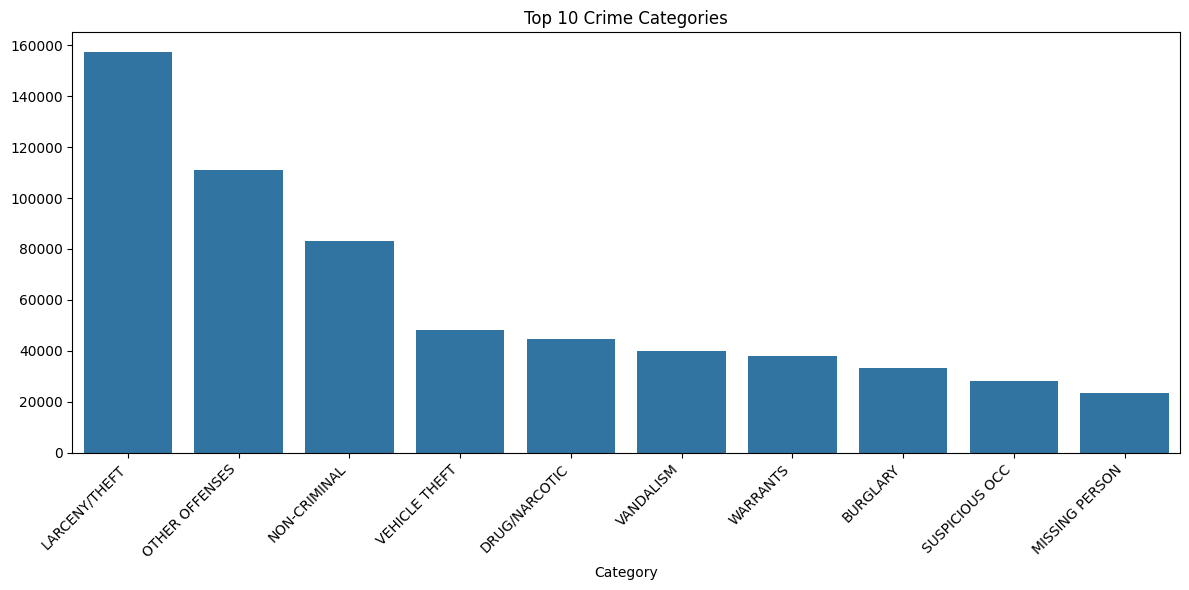

In [11]:

# 1. Distribution of crimes by category (top 10)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Top 10 Crime Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


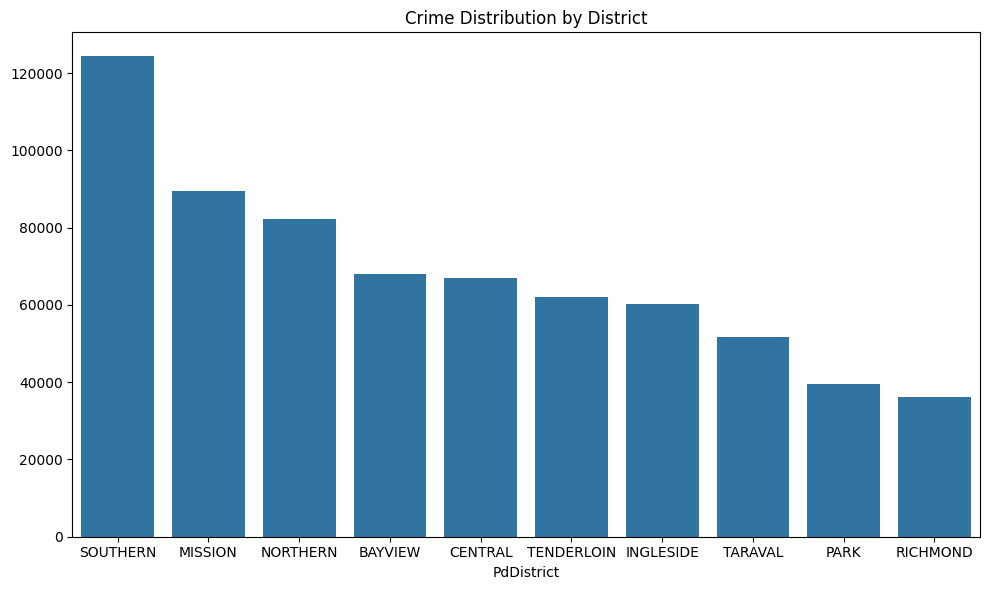

In [12]:

# 2. Distribution of crimes by district
plt.figure(figsize=(10, 6))
sns.barplot(x=district_counts.index, y=district_counts.values)
plt.title('Crime Distribution by District')
plt.tight_layout()
plt.show()


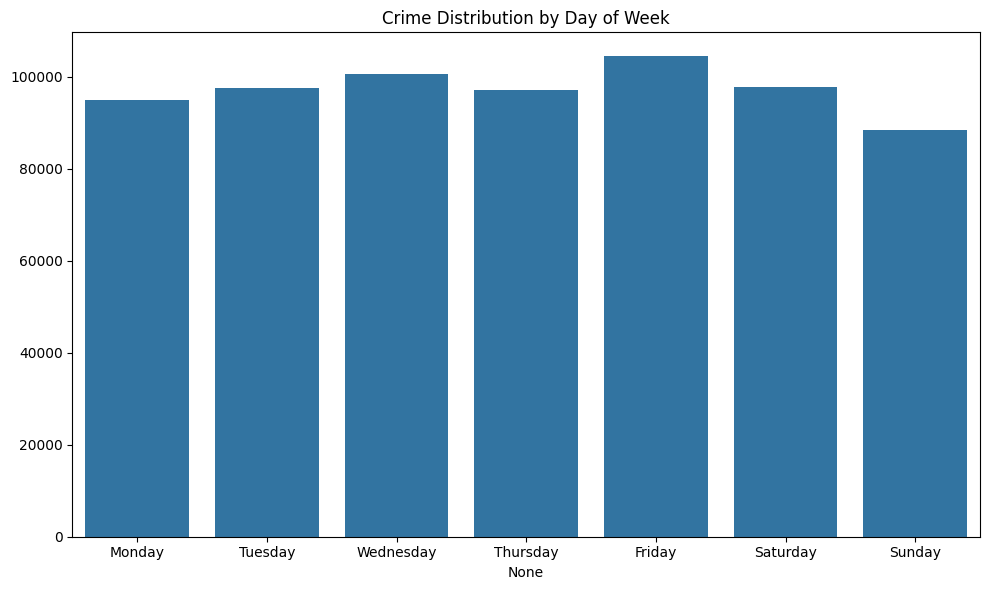

In [13]:

# 3. Distribution of crimes by day of week
plt.figure(figsize=(10, 6))
# Reorder days for better readability
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts_ordered = pd.Series([day_counts.get(day, 0) for day in days_order], index=days_order)
sns.barplot(x=day_counts_ordered.index, y=day_counts_ordered.values)
plt.title('Crime Distribution by Day of Week')
plt.tight_layout()
plt.show()


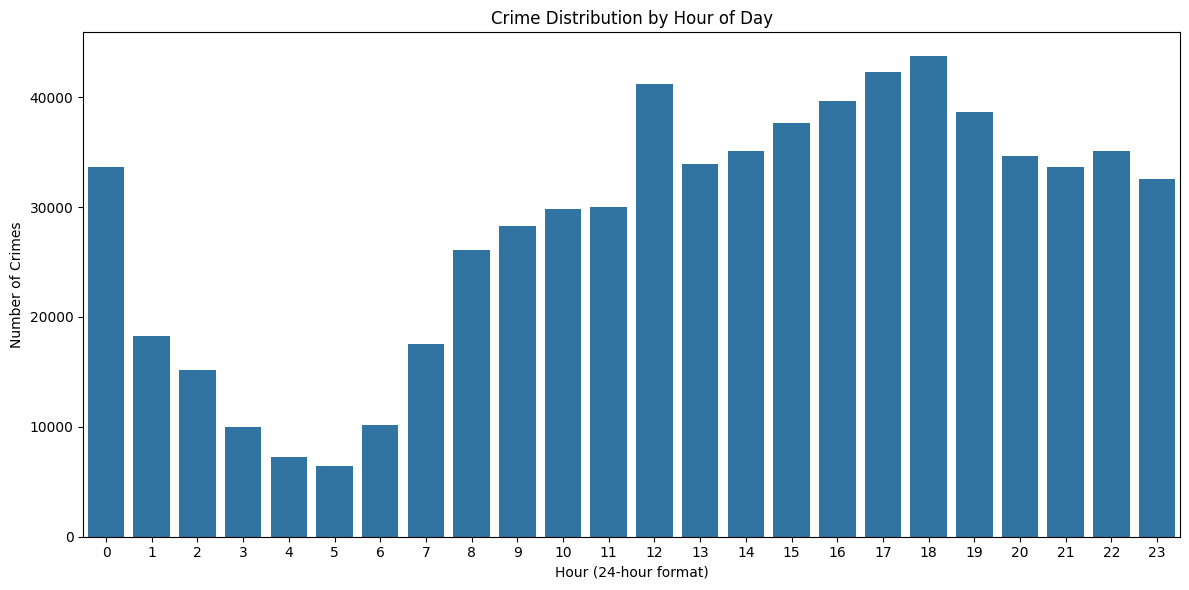

In [14]:

# 4. Distribution of crimes by hour of day
plt.figure(figsize=(12, 6))
hour_counts = df['Hour'].value_counts().sort_index()
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Crime Distribution by Hour of Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


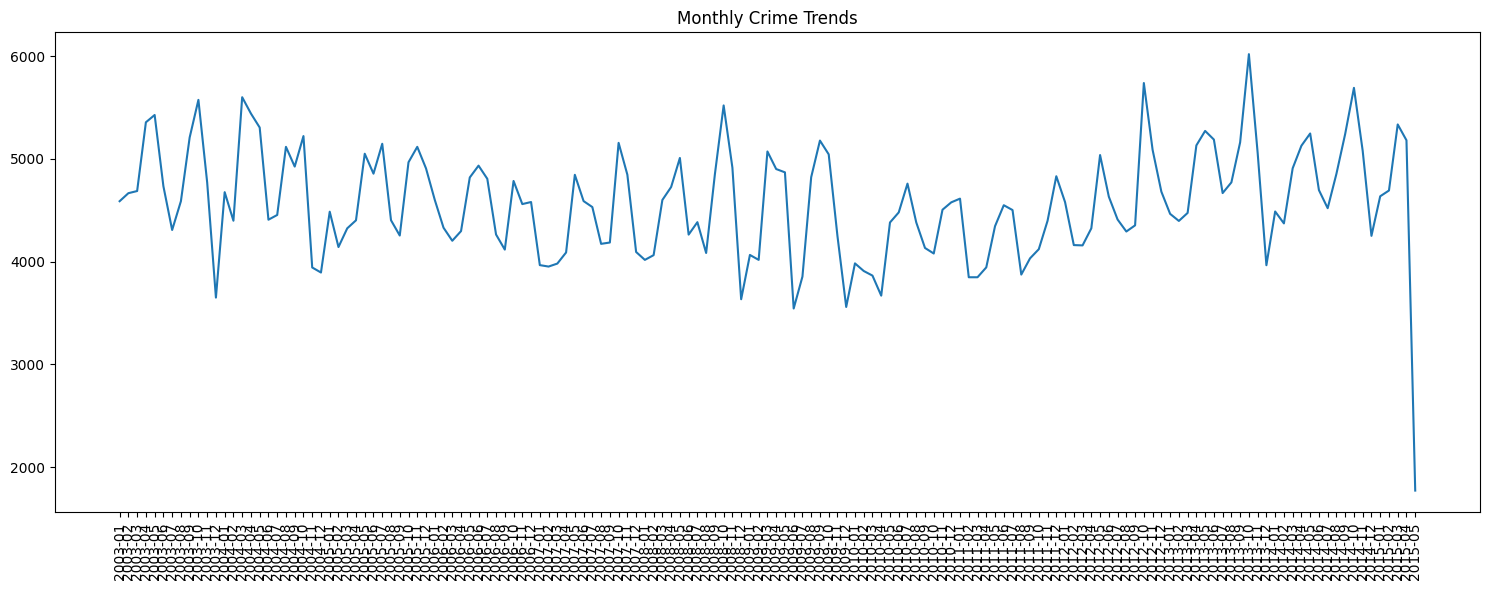

In [15]:

# 5. Crime trends over time (monthly)
plt.figure(figsize=(15, 6))
df['YearMonth'] = df['Dates'].dt.to_period('M')
monthly_counts = df.groupby('YearMonth').size()
monthly_counts.index = monthly_counts.index.astype(str)
plt.plot(monthly_counts.index, monthly_counts.values)
plt.title('Monthly Crime Trends')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


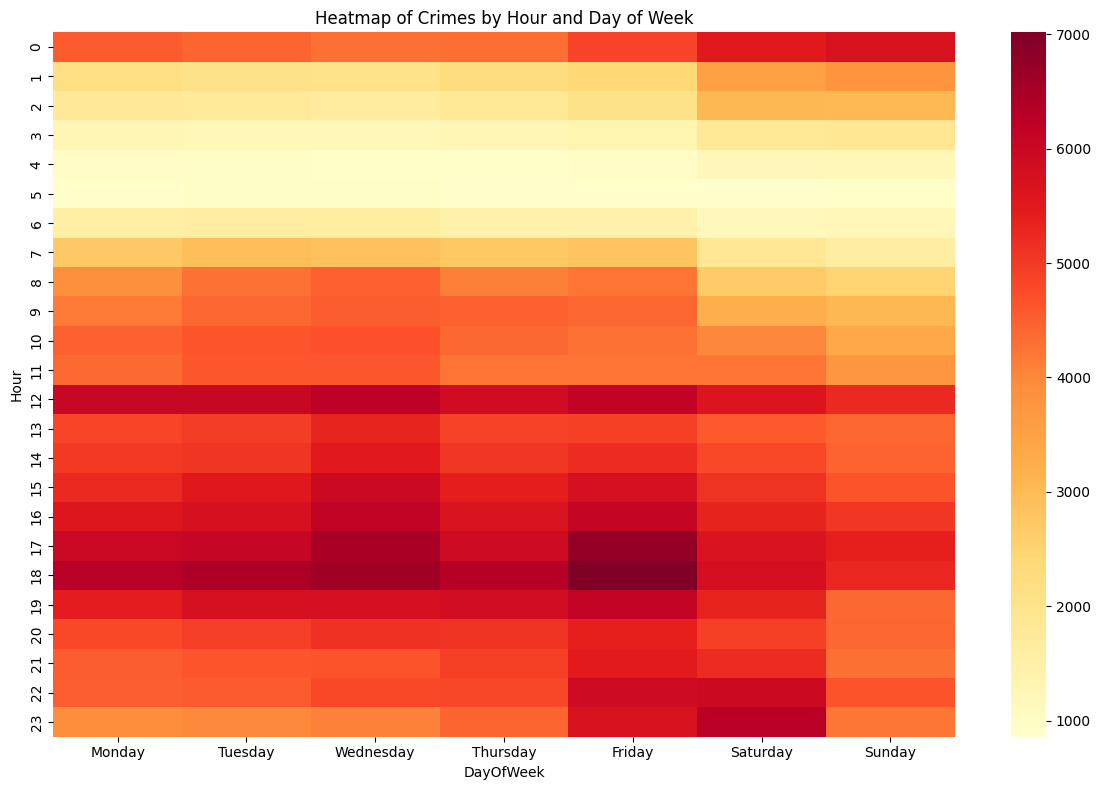

In [16]:

# 6. Heatmap of crimes by hour and day of week
plt.figure(figsize=(12, 8))
hour_day = pd.crosstab(df['Hour'], df['DayOfWeek'])
# Reorder columns to have days in order
hour_day = hour_day[days_order]
sns.heatmap(hour_day, cmap='YlOrRd')
plt.title('Heatmap of Crimes by Hour and Day of Week')
plt.tight_layout()
plt.show()


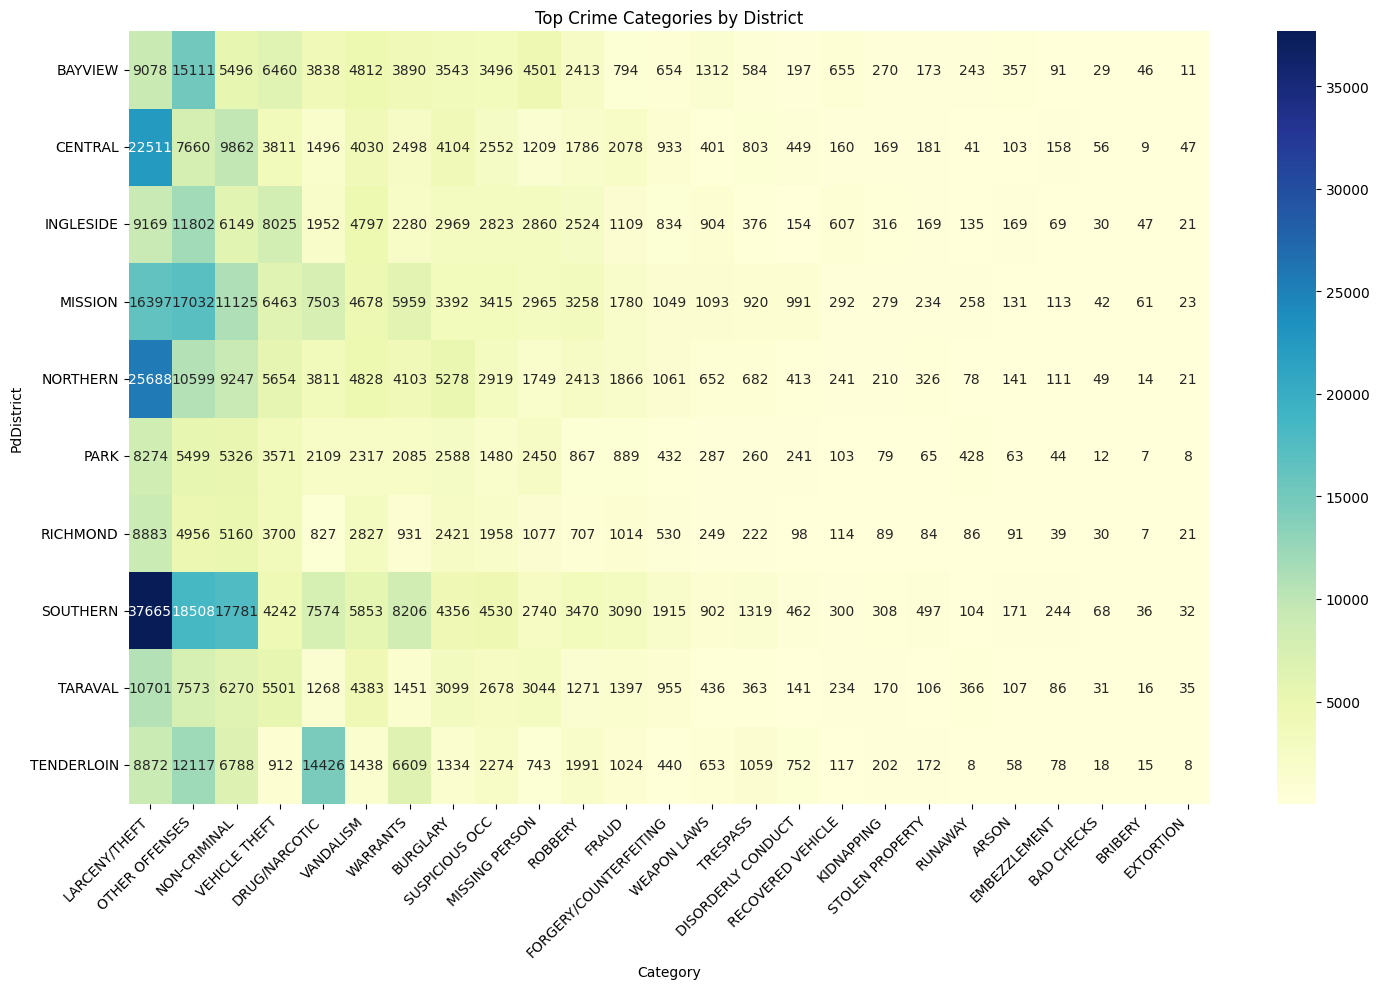

In [17]:
# 7. Top crime categories by district
plt.figure(figsize=(15, 10))
district_category = pd.crosstab(df['PdDistrict'], df['Category'])
# Select top 10 categories
top_categories = df['Category'].value_counts().index
district_category_top = district_category[top_categories]
sns.heatmap(district_category_top, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Top Crime Categories by District')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
X = df['Descript']
y = df['Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of categories to predict: {y.nunique()}")

# Build a classification pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
print("Training the classification model...")
pipeline.fit(X_train, y_train)

# Evaluate the model
print("Evaluating the model...")
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Check feature importance
tfidf = pipeline.named_steps['tfidf']
clf = pipeline.named_steps['clf']
feature_names = tfidf.get_feature_names_out()

# Get feature importances from the model
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the top 20 feature names and importances
print("\nTop 20 keywords for crime classification:")
for i in range(20):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

Training set size: 476578
Test set size: 204248
Number of categories to predict: 25
Training the classification model...
Evaluating the model...
Model accuracy: 0.9971

Classification Report:
                        precision    recall  f1-score   support

                 ARSON       1.00      1.00      1.00       425
            BAD CHECKS       1.00      1.00      1.00       127
               BRIBERY       1.00      1.00      1.00        65
              BURGLARY       1.00      1.00      1.00      9924
    DISORDERLY CONDUCT       1.00      1.00      1.00      1192
         DRUG/NARCOTIC       1.00      1.00      1.00     13447
          EMBEZZLEMENT       1.00      1.00      1.00       309
             EXTORTION       1.00      1.00      1.00        69
FORGERY/COUNTERFEITING       1.00      1.00      1.00      2643
                 FRAUD       1.00      1.00      1.00      4512
            KIDNAPPING       1.00      1.00      1.00       611
         LARCENY/THEFT       1.00      

In [24]:
def assign_severity(category):
    severity_1 = ['NON-CRIMINAL', 'SUSPICIOUS OCC', 'MISSING PERSON', 'RUNAWAY', 'RECOVERED VEHICLE']
    severity_2 = ['WARRANTS', 'OTHER OFFENSES', 'VANDALISM', 'TRESPASS', 'DISORDERLY CONDUCT', 'BAD CHECKS']
    severity_3 = ['LARCENY/THEFT', 'VEHICLE THEFT', 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 
                 'STOLEN PROPERTY', 'FRAUD', 'BRIBERY', 'EMBEZZLEMENT']
    severity_4 = ['ROBBERY', 'WEAPON LAWS', 'BURGLARY', 'EXTORTION']
    severity_5 = ['KIDNAPPING', 'ARSON']
    
    if category in severity_1:
        return 1
    elif category in severity_2:
        return 2
    elif category in severity_3:
        return 3
    elif category in severity_4:
        return 4
    elif category in severity_5:
        return 5
    else:
        return 0  # Unknown category


In [25]:

# Apply severity assignment to the dataset
df['Severity'] = df['Category'].apply(assign_severity)

# Check distribution of severity levels
severity_counts = df['Severity'].value_counts().sort_index()
print("Distribution of severity levels:")
print(severity_counts)


Distribution of severity levels:
Severity
1    139237
2    199683
3    277523
4     60900
5      3483
Name: count, dtype: int64


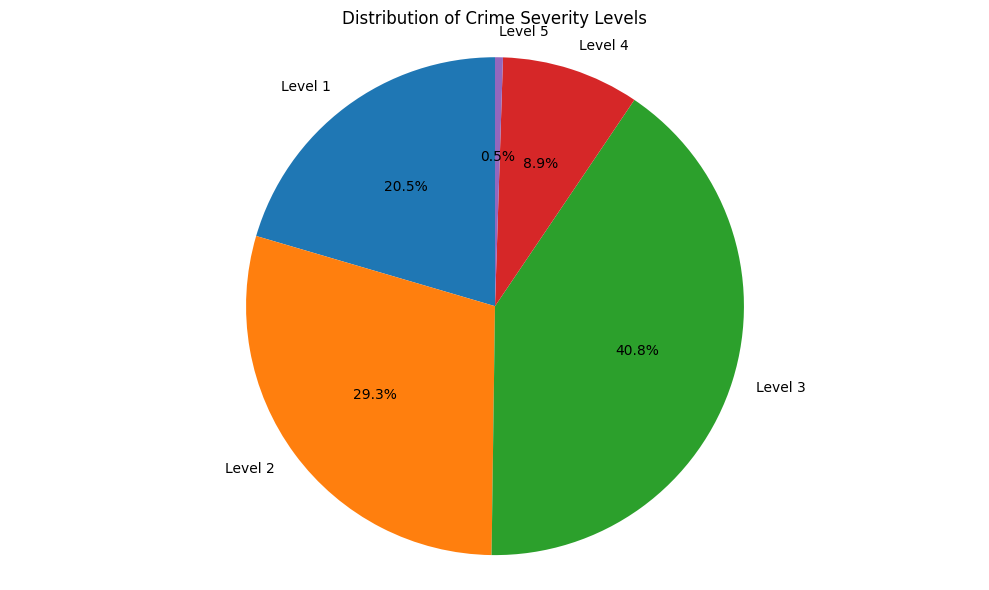

In [26]:

# Visualize severity distribution
plt.figure(figsize=(10, 6))
plt.pie(severity_counts.values, labels=[f"Level {i}" for i in severity_counts.index], 
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Crime Severity Levels')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [27]:

# Calculate average severity by district
district_severity = df.groupby('PdDistrict')['Severity'].mean().sort_values(ascending=False)
print("\nAverage crime severity by district:")
print(district_severity)



Average crime severity by district:
PdDistrict
NORTHERN      2.512184
CENTRAL       2.459639
TENDERLOIN    2.398676
SOUTHERN      2.392087
RICHMOND      2.388278
INGLESIDE     2.382999
MISSION       2.361162
TARAVAL       2.347336
PARK          2.342670
BAYVIEW       2.340641
Name: Severity, dtype: float64


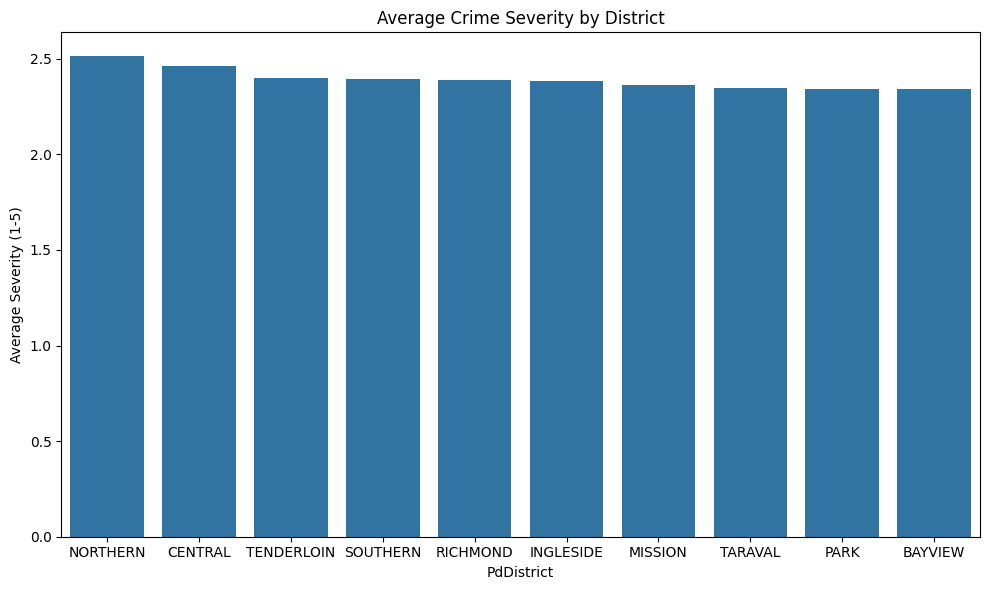

In [28]:

# Visualize average severity by district
plt.figure(figsize=(10, 6))
sns.barplot(x=district_severity.index, y=district_severity.values)
plt.title('Average Crime Severity by District')
plt.ylabel('Average Severity (1-5)')
plt.tight_layout()
plt.show()


In [29]:

# Calculate average severity by hour of day
hour_severity = df.groupby('Hour')['Severity'].mean()
print("\nAverage crime severity by hour of day:")
print(hour_severity)



Average crime severity by hour of day:
Hour
0     2.378999
1     2.436086
2     2.466509
3     2.474319
4     2.476868
5     2.472335
6     2.332155
7     2.224432
8     2.293387
9     2.285916
10    2.289420
11    2.312063
12    2.321708
13    2.342534
14    2.357377
15    2.369370
16    2.380117
17    2.443822
18    2.490107
19    2.494693
20    2.499740
21    2.471196
22    2.463732
23    2.469766
Name: Severity, dtype: float64


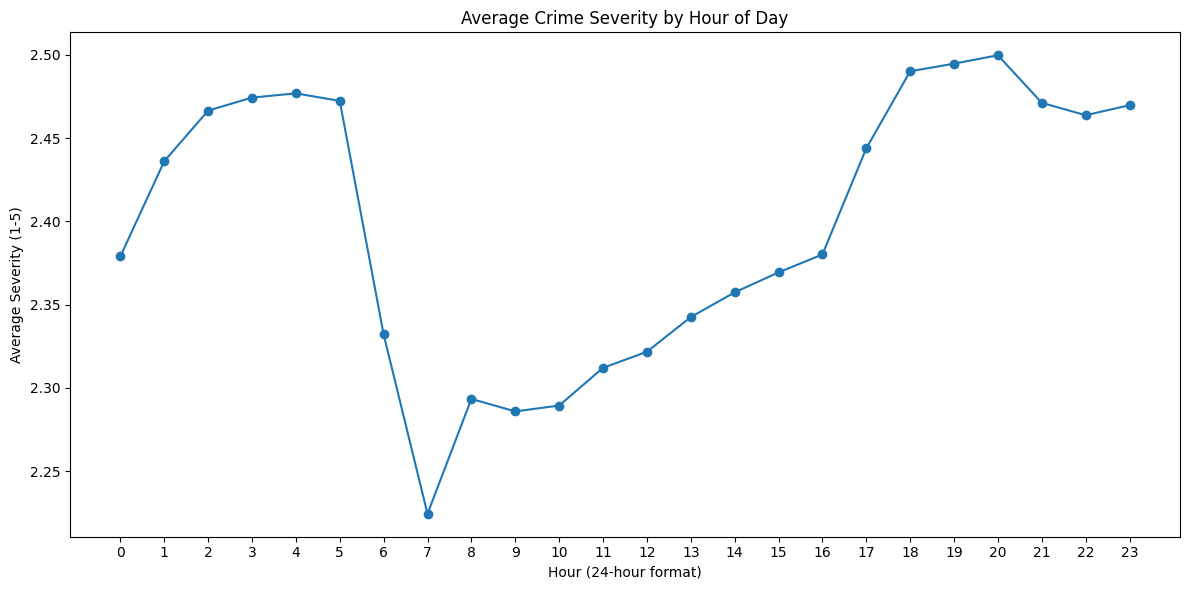

In [30]:

# Visualize average severity by hour of day
plt.figure(figsize=(12, 6))
plt.plot(hour_severity.index, hour_severity.values, marker='o')
plt.title('Average Crime Severity by Hour of Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Average Severity (1-5)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

In [31]:
def predict_crime_and_severity(description):
    # Predict crime category
    predicted_category = pipeline.predict([description])[0]
    
    # Assign severity based on predicted category
    severity = assign_severity(predicted_category)
    
    return predicted_category, severity


print("Predictions for crime descriptions:")
for desc in X_test[:100]:
    category, severity = predict_crime_and_severity(desc)
    print(f"Description: {desc}")
    print(f"Predicted Category: {category}")
    print(f"Assigned Severity: Level {severity}")
    print("-" * 40)

Predictions for crime descriptions:
Description: GRAND THEFT FROM LOCKED AUTO
Predicted Category: LARCENY/THEFT
Assigned Severity: Level 3
----------------------------------------
Description: BURGLARY OF STORE, UNLAWFUL ENTRY
Predicted Category: BURGLARY
Assigned Severity: Level 4
----------------------------------------
Description: STOLEN AUTOMOBILE
Predicted Category: VEHICLE THEFT
Assigned Severity: Level 3
----------------------------------------
Description: ILLEGAL SUBSTANCES
Predicted Category: DRUG/NARCOTIC
Assigned Severity: Level 3
----------------------------------------
Description: BURGLARY OF STORE, UNLAWFUL ENTRY
Predicted Category: BURGLARY
Assigned Severity: Level 4
----------------------------------------
Description: PETTY THEFT FROM LOCKED AUTO
Predicted Category: LARCENY/THEFT
Assigned Severity: Level 3
----------------------------------------
Description: STOLEN AND RECOVERED VEHICLE
Predicted Category: VEHICLE THEFT
Assigned Severity: Level 3
------------------

In [32]:
# Save the model
import joblib


print("Saving the model to crime_classifier.joblib...")
joblib.dump(pipeline, 'crime_classifier.joblib')

Saving the model to crime_classifier.joblib...


['crime_classifier.joblib']